In [1]:
from imageio import imread
from glob import iglob
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
faces = list(iglob("data/*.png"))
faces = np.stack([imread(p) / 255 for p in faces])

In [3]:
encoder = tf.keras.models.load_model("encoder.h5")
decoder = tf.keras.models.load_model("decoder.h5")

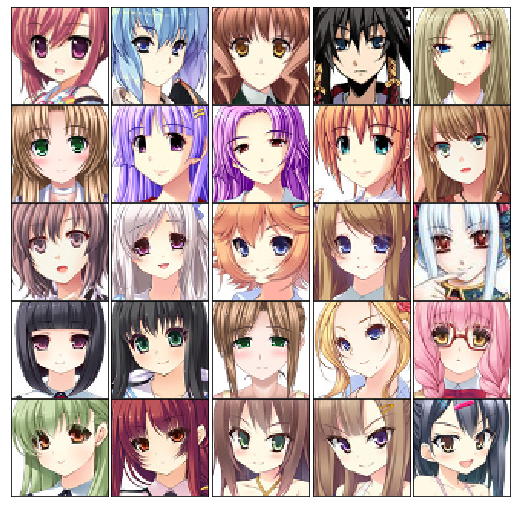

In [4]:
fig, axes = plt.subplots(5, 5, figsize=(9, 9),
                         subplot_kw={"xticks": [], "yticks": []},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces[i].reshape(64, 64, 3))

In [5]:
encoded_1 = encoder.predict(faces)

In [6]:
encoded = encoded_1

In [13]:
encoded.shape

(21551, 300)

In [110]:
pca = PCA(n_components=126)
pca.fit(encoded)

PCA(n_components=126)

In [111]:
pca.components_.shape

(126, 300)

In [112]:
components = pca.transform(encoded[:25])
projected = pca.inverse_transform(components)

In [113]:
decoded = decoder.predict(projected[:25])

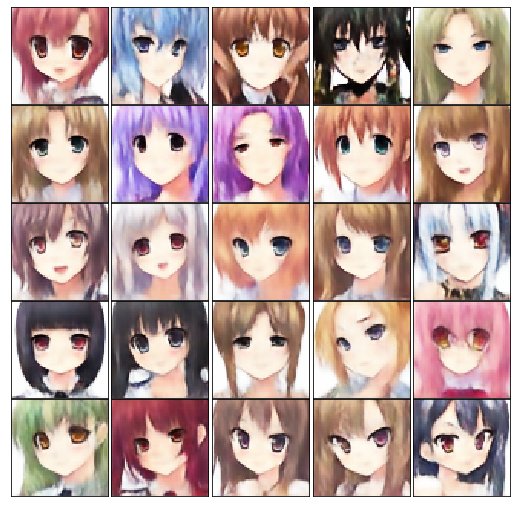

In [114]:
fig, axes = plt.subplots(5, 5, figsize=(9, 9),
                         subplot_kw={"xticks": [], "yticks": []},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(decoded[i])

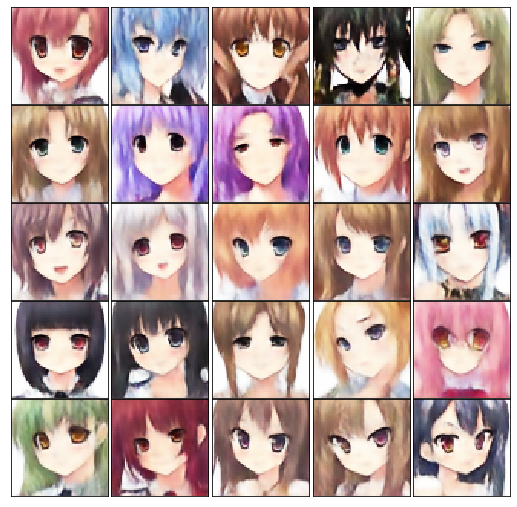

In [59]:
fig, axes = plt.subplots(5, 5, figsize=(9, 9),
                         subplot_kw={"xticks": [], "yticks": []},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(decoded[i])

In [106]:
from joblib import dump, load
dump(pca, "pca.joblib")

['pca.joblib']

In [61]:
print(components[0].tolist())

[-1.1944717168807983, 0.016733452677726746, -0.44916293025016785, 0.7866669297218323, -4.421246528625488, -0.24248814582824707, -2.007138252258301, 1.0506671667099, 0.5290369987487793, -2.3601701259613037, -0.787778377532959, 1.2636758089065552, -0.1511262059211731, 0.36798015236854553, -0.03931936249136925, 1.0566445589065552, -0.09564021974802017, 1.8665480613708496, 0.02908339537680149, -1.310080647468567, 1.5771366357803345, 1.6000818014144897, 0.1348472535610199, -0.23342297971248627, -1.1622600555419922, -0.10703830420970917, 1.351801872253418, 0.833195686340332, -0.9392755031585693, -0.16327515244483948, 2.70088791847229, -1.6117740869522095, 0.5054365992546082, -0.21085675060749054, -0.20031139254570007, 1.276313066482544, -0.020729197189211845, -0.665794849395752, -0.3034251630306244, 0.32004088163375854, -0.6745656132698059, 0.28506940603256226, 0.4598771631717682, -0.26584523916244507, -1.443583369255066, 0.5374227166175842, -0.053870104253292084, -0.7888420820236206, 0.1767

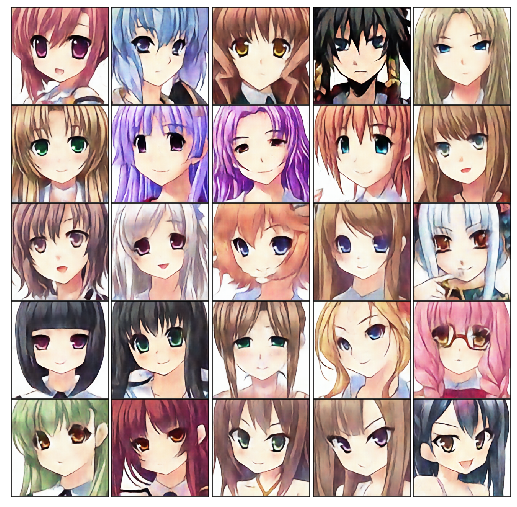

In [28]:
fig, axes = plt.subplots(5, 5, figsize=(9, 9),
                         subplot_kw={"xticks": [], "yticks": []},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(decoded[i])

In [107]:
with open("components.npy", "wb") as f:
    np.save(f, pca[1].components_.astype(np.float32))

with open("scale.npy", "wb") as f:
    np.save(f, pca[0].scale_.astype(np.float32))

with open("mean.npy", "wb") as f:
    np.save(f, pca[0].mean_.astype(np.float32))

import tensorflowjs as tfjs
tfjs.converters.save_keras_model(decoder, "decoder")

C:\Users\olive\AppData\Roaming\Python\Python37\site-packages\tensorflowjs\converters\keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [87]:
print(pca.scale_)

AttributeError: 'PCA' object has no attribute 'scale_'

In [115]:
import math
print((pca.explained_variance_ratio_.astype(np.float64) * 100).round(2).tolist())

[7.47, 3.64, 3.33, 2.81, 2.4, 2.24, 2.13, 2.04, 1.7, 1.56, 1.4, 1.35, 1.3, 1.24, 1.21, 1.2, 1.15, 1.11, 1.09, 1.07, 1.04, 1.01, 0.99, 0.98, 0.95, 0.94, 0.92, 0.89, 0.88, 0.85, 0.85, 0.83, 0.81, 0.8, 0.79, 0.78, 0.78, 0.76, 0.75, 0.75, 0.74, 0.73, 0.72, 0.71, 0.71, 0.7, 0.7, 0.68, 0.68, 0.67, 0.66, 0.66, 0.65, 0.64, 0.63, 0.63, 0.61, 0.61, 0.6, 0.6, 0.59, 0.59, 0.57, 0.57, 0.57, 0.56, 0.55, 0.55, 0.54, 0.54, 0.53, 0.53, 0.53, 0.52, 0.52, 0.51, 0.51, 0.5, 0.5, 0.49, 0.49, 0.48, 0.48, 0.48, 0.48, 0.47, 0.46, 0.46, 0.46, 0.45, 0.45, 0.45, 0.44, 0.44, 0.43, 0.42, 0.42, 0.41, 0.41, 0.41, 0.41, 0.4, 0.4, 0.39, 0.39, 0.39, 0.38, 0.37, 0.37, 0.36, 0.36, 0.35, 0.34, 0.34, 0.33, 0.33, 0.32, 0.31, 0.31, 0.29, 0.26, 0.21, 0.19, 0.15, 0.14, 0.09]


In [101]:
print(np.mean(components.astype(np.float64), axis=0).round(3).tolist())

[-0.427, -0.488, -0.765, 0.469, -0.504, 0.322, 0.094, -0.45, -0.08, 0.121, -0.583, 0.216, 0.02, 0.054, -0.583, -0.084, -0.083, 0.184, 0.457, 0.16, -0.194, -0.311, -0.103, 0.48, -0.051, -0.189, 0.385, 0.291, 0.134, 0.476, -0.24, -0.01, 0.381, -0.294, -0.427, 0.01, -0.219, 0.334, -0.27, 0.372, -0.234, -0.003, 0.036, -0.22, -0.156, 0.263, -0.055, -0.192, -0.027, 0.123, -0.061, -0.22, -0.108, -0.045, 0.185, 0.183, 0.406, -0.228, -0.121, -0.147, -0.205, 0.23, 0.216, 0.166, -0.014, -0.007, 0.139, -0.004, -0.031, -0.046, 0.14, 0.206, -0.138, -0.049, 0.024, -0.034, 0.097, -0.087, -0.179, -0.052, 0.31, 0.12, -0.237, 0.081, -0.128, -0.261, 0.025, 0.245, -0.04, -0.066, 0.171, 0.04, 0.137, 0.023, 0.049, 0.268, -0.155, -0.317, 0.076, -0.007, -0.313, 0.248, -0.187, 0.124, 0.203, -0.129, -0.047, -0.063, 0.002, -0.181, 0.04, 0.103, 0.179, 0.207, -0.078, 0.237, 0.042, 0.013, -0.059, 0.0, 0.127, 0.092, -0.107, -0.041, -0.065, 0.003]


In [120]:
print(pca.mean_.astype(np.float64).round(3).tolist())

[0.0, 1.884, 2.182, 0.0, 0.011, 0.0, 0.0, 0.0, 0.0, 0.0, 2.212, 2.16, 1.74, 0.0, 2.12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.705, 1.674, 1.917, 0.0, 0.0, 1.746, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.197, 0.0, 1.741, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.607, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.301, 1.923, 0.0, 0.0, 2.102, 1.657, 0.0, 1.651, 1.944, 1.999, 1.947, 0.0, 2.049, 0.0, 0.0, 0.0, 1.769, 2.028, 2.32, 0.0, 1.727, 0.0, 0.0, 0.0, 0.0, 1.733, 0.0, 1.77, 0.0, 0.0, 0.0, 0.0, 0.0, 2.08, 0.0, 0.0, 1.772, 1.915, 0.0, 1.956, 1.074, 0.0, 1.827, 1.763, 0.0, 1.793, 0.0, 0.0, 0.0, 0.0, 0.0, 1.888, 0.0, 0.0, 0.0, 0.0, 0.452, 0.0, 0.0, 0.0, 1.794, 1.726, 0.0, 0.0, 1.86, 1.69, 0.0, 0.0, 0.0, 1.717, 0.0, 0.0, 2.165, 1.66, 2.938, 0.0, 0.0, 0.0, 1.791, 2.073, 0.0, 0.0, 2.096, 0.0, 0.0, 0.0, 1.718, 1.809, 0.0, 0.0, 1.891, 1.89, 0.0, 1.768, 0.0, 1.744, 0.0, 1.6, 1.704, 1.616, 1.549, 0.0, 0.0, 0.0, 2.106, 0.0, 1.691, 2.577, 0.0, 1.586, 2.044, 1.719, 0.0, 1.779, 0.0, 1.818, 0.117, 0.0, 2.319, 1